In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
df = pd.read_csv('./data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,15.0,34.7,32.1,10.4,21.1,49.4,1.0,...,88.1,3.2,8.1,11.3,6.3,1.0,1.9,3.7,36.9,2023-24
2,2,Kevin Durant,PHX,15.0,36.9,31.4,10.7,20.1,53.3,2.3,...,89.1,0.3,6.7,7.1,5.5,0.7,1.2,4.0,31.5,2023-24
3,3,Luka Doncic,DAL,16.0,35.1,30.5,10.5,21.6,48.7,3.8,...,76.5,0.6,7.3,7.9,7.8,1.3,0.4,3.9,31.3,2023-24
4,4,Shai Gilgeous-Alexander,OKC,15.0,34.3,30.4,11.1,20.7,53.4,1.3,...,93.7,0.9,5.3,6.1,6.2,2.3,0.9,2.3,33.5,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,129,Udonis Haslem,MIA,75.0,24.0,7.3,2.7,6.0,45.9,0.0,...,76.5,2.5,3.8,6.3,0.7,0.4,0.3,1.0,10.3,2003-04
4375,130,Derek Fisher,LAL,82.0,21.5,7.1,2.5,7.0,35.2,0.6,...,79.7,0.4,1.5,1.9,2.3,1.3,0.0,1.0,6.6,2003-04
4376,131,Damon Jones,MIL,82.0,24.6,7.0,2.6,6.4,40.1,1.2,...,76.4,0.2,1.9,2.1,5.8,0.4,0.0,1.3,10.0,2003-04
4377,132,Raul Lopez,UTA,82.0,19.7,7.0,2.7,6.3,43.1,0.3,...,86.3,0.3,1.6,1.9,3.7,0.8,0.0,2.1,7.5,2003-04


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4379 entries, 0 to 4378
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       4379 non-null   object 
 1   PLAYER  4358 non-null   object 
 2   TEAM    4358 non-null   object 
 3   GP      4358 non-null   float64
 4   MIN     4358 non-null   float64
 5   PTS     4358 non-null   float64
 6   FGM     4358 non-null   float64
 7   FGA     4358 non-null   float64
 8   FG%     4358 non-null   float64
 9   3PM     4358 non-null   float64
 10  3PA     4358 non-null   float64
 11  3P%     4358 non-null   float64
 12  FTM     4358 non-null   float64
 13  FTA     4358 non-null   float64
 14  FT%     4358 non-null   float64
 15  OREB    4358 non-null   float64
 16  DREB    4358 non-null   float64
 17  REB     4358 non-null   float64
 18  AST     4358 non-null   float64
 19  STL     4358 non-null   float64
 20  BLK     4358 non-null   float64
 21  TOV     4358 non-null   float64
 22  

# Data Cleaning

In [274]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [275]:
# Create a rearranged list 
arrange_columns = ['PLAYER', 'YEAR','TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,15.0,34.7,32.1,10.4,21.1,49.4,1.0,...,11.7,88.1,3.2,8.1,11.3,6.3,1.0,1.9,3.7,36.9
2,Kevin Durant,2023-24,PHX,15.0,36.9,31.4,10.7,20.1,53.3,2.3,...,8.5,89.1,0.3,6.7,7.1,5.5,0.7,1.2,4.0,31.5
3,Luka Doncic,2023-24,DAL,16.0,35.1,30.5,10.5,21.6,48.7,3.8,...,7.4,76.5,0.6,7.3,7.9,7.8,1.3,0.4,3.9,31.3
4,Shai Gilgeous-Alexander,2023-24,OKC,15.0,34.3,30.4,11.1,20.7,53.4,1.3,...,7.4,93.7,0.9,5.3,6.1,6.2,2.3,0.9,2.3,33.5
5,Giannis Antetokounmpo,2023-24,MIL,16.0,33.6,29.9,11.4,19.3,59.4,0.4,...,10.4,63.3,2.7,7.9,10.6,4.6,1.2,1.2,4.1,31.8


In [276]:
player_count = df['PLAYER'].nunique()
team_count = df['TEAM'].nunique()

print(f"Number of players: {player_count}")
print(f"Number of teams: {team_count}")

Number of players: 1079
Number of teams: 34


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4358 entries, 1 to 4378
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  4358 non-null   object 
 1   YEAR    4358 non-null   object 
 2   TEAM    4358 non-null   object 
 3   GP      4358 non-null   float64
 4   MIN     4358 non-null   float64
 5   PTS     4358 non-null   float64
 6   FGM     4358 non-null   float64
 7   FGA     4358 non-null   float64
 8   FG%     4358 non-null   float64
 9   3PM     4358 non-null   float64
 10  3PA     4358 non-null   float64
 11  3P%     4358 non-null   float64
 12  FTM     4358 non-null   float64
 13  FTA     4358 non-null   float64
 14  FT%     4358 non-null   float64
 15  OREB    4358 non-null   float64
 16  DREB    4358 non-null   float64
 17  REB     4358 non-null   float64
 18  AST     4358 non-null   float64
 19  STL     4358 non-null   float64
 20  BLK     4358 non-null   float64
 21  TOV     4358 non-null   float64
 22  

# Visualization

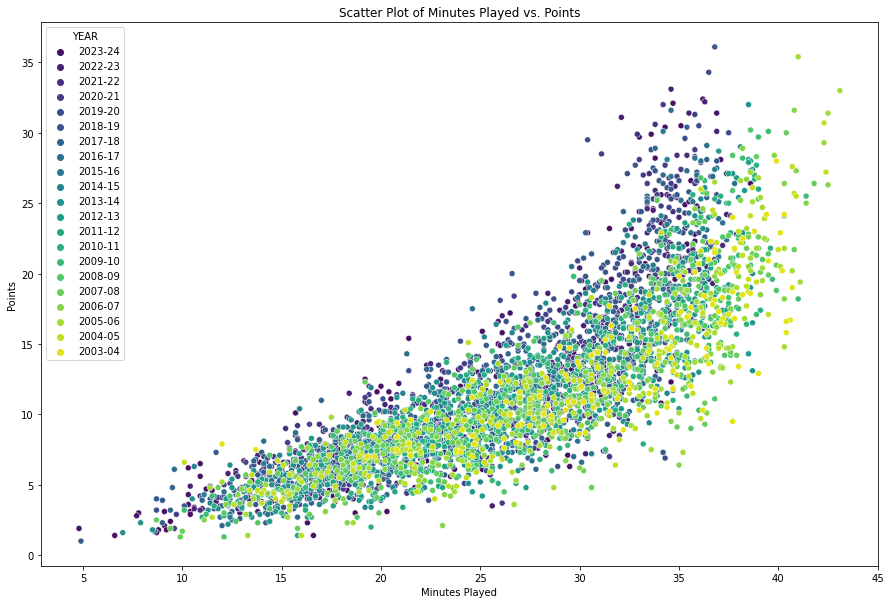

In [278]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(15, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [279]:
# Create a data frame of players with avg points of 15 or greater
df = df.loc[df['PTS'] >= 15]

In [292]:
# Find the top 10 scorers of the 2022-23 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,15.0,34.7,32.1,10.4,21.1,49.4,1.0,...,11.7,88.1,3.2,8.1,11.3,6.3,1.0,1.9,3.7,36.9
2,Kevin Durant,2023-24,PHX,15.0,36.9,31.4,10.7,20.1,53.3,2.3,...,8.5,89.1,0.3,6.7,7.1,5.5,0.7,1.2,4.0,31.5
3,Luka Doncic,2023-24,DAL,16.0,35.1,30.5,10.5,21.6,48.7,3.8,...,7.4,76.5,0.6,7.3,7.9,7.8,1.3,0.4,3.9,31.3
4,Shai Gilgeous-Alexander,2023-24,OKC,15.0,34.3,30.4,11.1,20.7,53.4,1.3,...,7.4,93.7,0.9,5.3,6.1,6.2,2.3,0.9,2.3,33.5
5,Giannis Antetokounmpo,2023-24,MIL,16.0,33.6,29.9,11.4,19.3,59.4,0.4,...,10.4,63.3,2.7,7.9,10.6,4.6,1.2,1.2,4.1,31.8
6,Stephen Curry,2023-24,GSW,15.0,33.0,29.7,9.2,19.0,48.4,5.3,...,6.4,93.8,0.7,3.9,4.6,3.9,0.8,0.1,3.7,25.3
7,Nikola Jokic,2023-24,DEN,16.0,33.8,28.2,11.0,19.4,56.6,1.4,...,6.1,78.4,3.2,10.3,13.5,8.9,1.2,0.8,3.1,39.7
8,Jayson Tatum,2023-24,BOS,17.0,37.1,28.1,9.8,19.9,49.4,3.2,...,6.5,80.2,0.7,8.2,8.9,4.1,1.2,0.4,3.2,28.1
9,Anthony Edwards,2023-24,MIN,16.0,35.6,26.6,9.4,20.1,46.6,2.5,...,6.1,87.6,0.8,5.1,5.9,5.3,1.4,0.4,3.3,24.8
10,Trae Young,2023-24,ATL,15.0,35.9,26.5,7.7,19.1,40.2,3.1,...,9.2,87.7,0.7,2.3,3.0,10.4,1.6,0.0,3.9,25.0


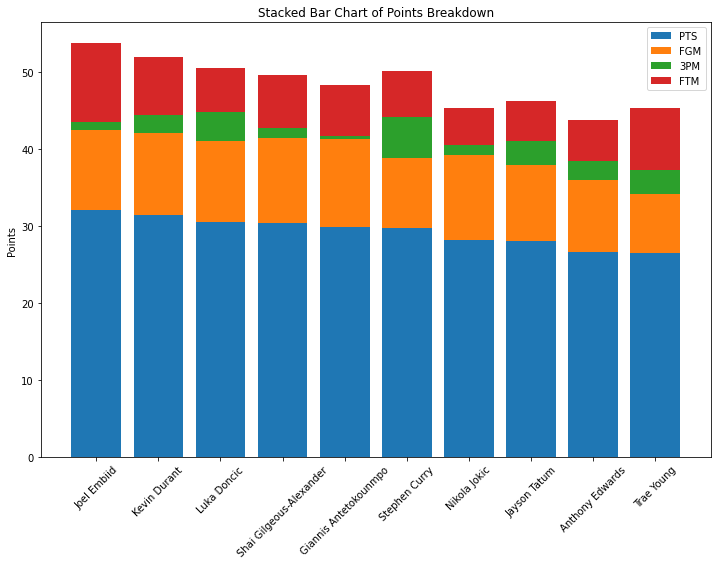

In [291]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [300]:
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds.sort_values(by='REB', ascending=False, inplace=True)
top_ten_rebounds

,PLAYER,YEAR,MIN,PTS,REB
7,Nikola Jokic,2023-24,33.8,28.2,13.5
1,Joel Embiid,2023-24,34.7,32.1,11.3
5,Giannis Antetokounmpo,2023-24,33.6,29.9,10.6
8,Jayson Tatum,2023-24,37.1,28.1,8.9
3,Luka Doncic,2023-24,35.1,30.5,7.9
2,Kevin Durant,2023-24,36.9,31.4,7.1
4,Shai Gilgeous-Alexander,2023-24,34.3,30.4,6.1
9,Anthony Edwards,2023-24,35.6,26.6,5.9
11,Tyrese Maxey,2023-24,38.6,26.4,4.9
6,Stephen Curry,2023-24,33.0,29.7,4.6


In [310]:
curry_stats = df.loc[df['PLAYER'] == 'Stephen Curry']
curry_stats

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
6,Stephen Curry,2023-24,GSW,15.0,33.0,29.7,9.2,19.0,48.4,5.3,...,6.4,93.8,0.7,3.9,4.6,3.9,0.8,0.1,3.7,25.3
522,Stephen Curry,2021-22,GSW,64.0,34.5,25.5,8.4,19.1,43.7,4.5,...,4.7,92.3,0.5,4.7,5.2,6.3,1.3,0.4,3.2,24.4
742,Stephen Curry,2020-21,GSW,63.0,34.2,32.0,10.4,21.7,48.2,5.3,...,6.3,91.6,0.5,5.0,5.5,5.8,1.2,0.1,3.4,29.4
1246,Stephen Curry,2018-19,GSW,69.0,33.8,27.3,9.2,19.4,47.2,5.1,...,4.2,91.6,0.7,4.7,5.3,5.2,1.3,0.4,2.8,26.1
1764,Stephen Curry,2016-17,GSW,79.0,33.4,25.3,8.5,18.3,46.8,4.1,...,4.6,89.8,0.8,3.7,4.5,6.6,1.8,0.2,3.0,25.2
2027,Stephen Curry,2015-16,GSW,79.0,34.2,30.1,10.2,20.2,50.4,5.1,...,5.1,90.8,0.9,4.6,5.4,6.7,2.1,0.2,3.3,30.7
2061,Stephen Curry,2014-15,GSW,80.0,32.7,23.8,8.2,16.8,48.7,3.6,...,4.2,91.4,0.7,3.6,4.3,7.7,2.0,0.2,3.1,25.9
2330,Stephen Curry,2013-14,GSW,78.0,36.5,24.0,8.4,17.7,47.1,3.3,...,4.5,88.5,0.6,3.7,4.3,8.5,1.6,0.2,3.8,25.0
2590,Stephen Curry,2012-13,GSW,78.0,38.2,22.9,8.0,17.8,45.1,3.5,...,3.7,90.0,0.8,3.3,4.0,6.9,1.6,0.2,3.1,22.4
2974,Stephen Curry,2010-11,GSW,74.0,33.6,18.6,6.8,14.2,48.0,2.0,...,3.1,93.4,0.7,3.2,3.9,5.8,1.5,0.3,3.1,19.3


In [314]:
# Change 'YEAR' column type from object to numeric
curry_stats['YEAR'].str.replace(r'-\d+', '', regex=True)

6       2023
522     2021
742     2020
1246    2018
1764    2016
2027    2015
2061    2014
2330    2013
2590    2012
2974    2010
3169    2009
Name: YEAR, dtype: object